In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import string

import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

import seaborn as sns
from textblob import TextBlob
import spacy


## 1.
- What is the most common negatively ranked word in nobel prize winners text? 

In [2]:
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\24769\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\24769\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Read CSV file into pandas DataFrame
df = pd.read_csv('Nobel_Peace_Cleaned_Lectures_Final.csv')

In [4]:
df1=df.drop(columns=['Unnamed: 3'])
df1=df1.dropna(subset=['Lecture'])

In [5]:
# Create sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define stop words to remove from text
stop_words = stopwords.words(['english','french','arabic'])+ ['amp','\n',';',',',':',''," ",'–','-','_','–'
                                         'can', 'could', 'may', 'might', 'must', 
                                          'will', 'would', 'should', 'shall',
                                          'america', 'canada','france', 
                                          'germany', 'italy', 'china', 'japan', 
                                          'spain','us','one','Nobel']#+ list(string.punctuation) 
punctuations = string.punctuation

In [6]:
# Remove stop words and punctuation marks
df1['words'] = df1['Lecture'].apply(lambda x: 
                                    x.translate(
                                        str.maketrans('',
                                                      '', punctuations)).split())

df1['words'] = df1['words'].apply(lambda 
                                  x: [word 
                                      for word in x 
                                      if word.lower() not in stop_words])

In [7]:
df1

Year                                             Winner  \
1    1902                                              gobat   
2    1903                                             cremer   
4    1905                                            suttner   
5    1906                                          roosevelt   
6    1907                                             moneta   
..    ...                                                ...   
111  2015                 Tunisian National Dialogue Quartet   
112  2016                                             santos   
113  2017  International Campaign to Abolish Nuclear Weapons   
114  2018                                            mukwege   
115  2019                                               abiy   

                                               Lecture  \
1    It will soon be seven years since the ninth In...   
2    For many reasons I regret the delay which has ...   
4    The stars of eternal truth and right have alwa...   
5    It is with peculiar pleasure that I stand here...   
6    When on the afternoon of December 10, 1907, I ...   
..                                                 ...   
111  His Majesty,
Their Highnesses,
The respected m...   
112  Your Majesties; Your Royal Highnesses; disting...   
113  Your Majesties,
Members of the Norwegian Nobel...   
114  In the tragic night of 6 October 1996, rebels ...   
115  \nYour Majesties, Your Royal Highnesses,\nDist...   

                                                 words  
1    [soon, seven, years, since, ninth, Interparlia...  
2    [many, reasons, regret, delay, taken, place, a...  
4    [stars, eternal, truth, right, always, shone, ...  
5    [peculiar, pleasure, stand, today, express, de...  
6    [afternoon, December, 10, 1907, received, happ...  
..                                                 ...  
111  [Majesty, Highnesses, respected, members, Nobe...  
112  [Majesties, Royal, Highnesses, distinguished, ...  
113  [Majesties, Members, Norwegian, Nobel, Committ...  
114  [tragic, night, 6, October, 1996, rebels, atta...  
115  [Majesties, Royal, Highnesses, Distinguished, ...  

[83 rows x 4 columns]

In [8]:
# Define lemmatizer
lemmatizer = WordNetLemmatizer()

In [9]:
# Define list to store negative words
negative_words = []

# Iterate over each row in the DataFrame
for index, row in df1.iterrows():
    # Get text from "words" column and remove stop words
    text = ' '.join([word.lower() for word in row['words'] 
                 if word.lower() not in stop_words])

    # Determine sentiment of text and add negative words to list
    sentiment = analyzer.polarity_scores(text)
    for word in text.split():
        if sentiment['neg'] > 0 and analyzer.polarity_scores(word)['neg'] > 0:
            # Lemmatize the word
            word = lemmatizer.lemmatize(word, pos='n')
            negative_words.append(word)

# Count occurrences of each negative word
word_counts_neg = pd.Series(negative_words).value_counts()

In [10]:
# Print most 10 common negative word
print(word_counts_neg.head(10))

war            1066
weapon          266
problem         231
conflict        198
struggle        153
violence        122
fear            107
destruction      99
poor             94
poverty          90
dtype: int64


In [11]:
# Initialize list of positive words
pos_word_list = []

# Loop through each row in dataframe
for index, row in df1.iterrows():
    # Get text from "words" column and remove stop words
    text = ' '.join([word for word in row['words'] if word.lower() not in stop_words])
    
    # Determine sentiment of text and add positive words to list
    sentiment = analyzer.polarity_scores(text)['compound']
    if sentiment > 0:
        # Lemmatize each word and add to list
        pos_word_list.extend([lemmatizer.lemmatize(word.lower()) 
                              for word in row['words'] 
                              if word.lower() not in stop_words])
        
# Get the 10 most common positive words
word_counts_pos = pd.Series(pos_word_list).value_counts()

In [12]:
# Print most 10 common positive word
print(word_counts_pos.head(10))

peace            1406
world             916
war               891
people            836
nation            790
international     566
human             477
great             465
country           454
time              423
dtype: int64


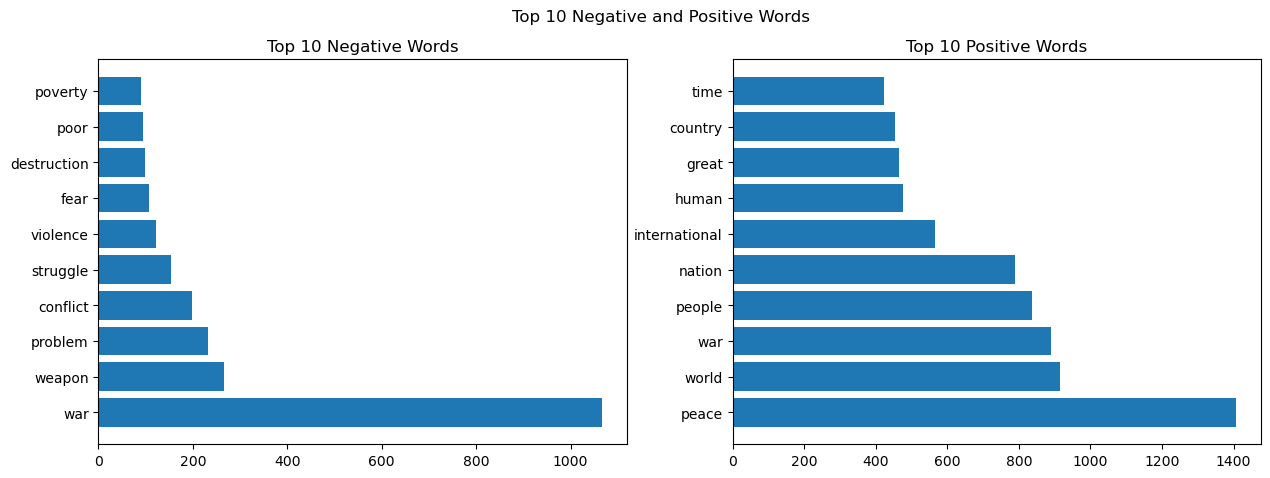

In [13]:
# Define the top 10 negative words and their counts
neg_words = word_counts_neg.head(10)
# Define the top 10 positive words and their counts
pos_words = word_counts_pos.head(10)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the top 10 negative words on the first subplot
ax1.barh(neg_words.index, neg_words.values)
ax1.set_title('Top 10 Negative Words')

# Plot the top 10 positive words on the second subplot
ax2.barh(pos_words.index, pos_words.values)
ax2.set_title('Top 10 Positive Words')

# Add a title for the entire figure
fig.suptitle('Top 10 Negative and Positive Words')

# Display the plot
plt.show()


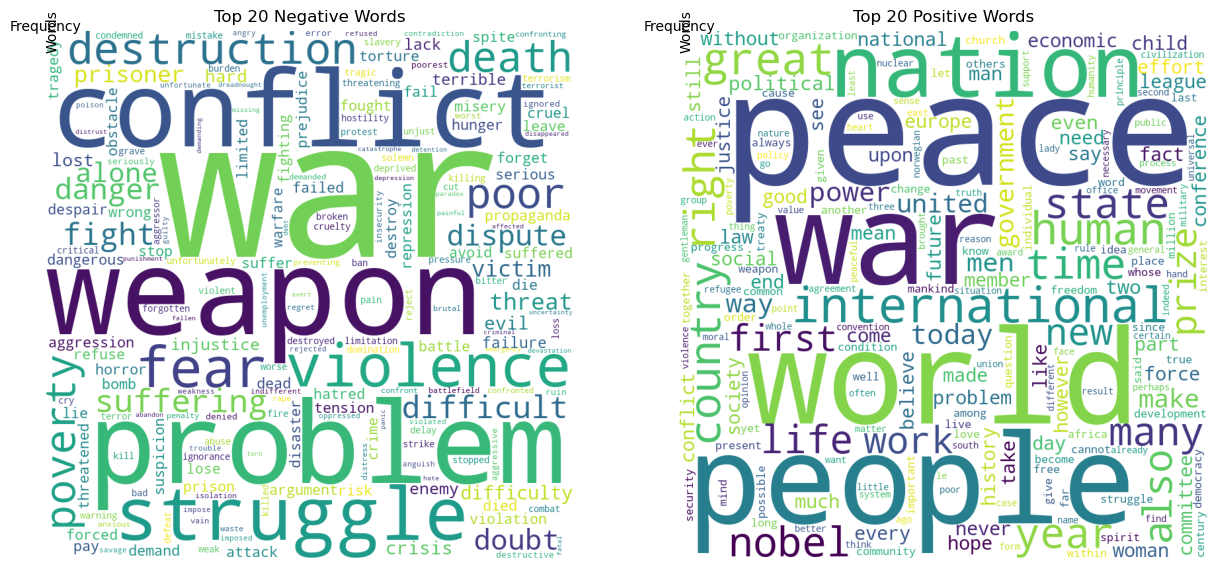

In [14]:
# create a WordCloud object for negative words
wordcloud_neg = WordCloud(width = 800, height = 800, background_color ='white', 
                stopwords = stop_words, min_font_size = 10).generate_from_frequencies(word_counts_neg)

# create a WordCloud object for positive words
wordcloud_pos = WordCloud(width = 800, height = 800, background_color ='white', 
                stopwords = stop_words, min_font_size = 10).generate_from_frequencies(word_counts_pos)

# combine the two WordClouds into one figure
fig, axs = plt.subplots(ncols=2, figsize=(15, 8))
axs[0].imshow(wordcloud_neg)
axs[0].axis("off")
axs[0].set_title("Top 20 Negative Words")
axs[0].text(0.5, -0.1, 'Frequency', ha='center')
axs[0].text(-0.1, 0.5, 'Words', va='center', rotation='vertical')

axs[1].imshow(wordcloud_pos)
axs[1].axis("off")
axs[1].set_title("Top 20 Positive Words")
axs[1].text(0.5, -0.1, 'Frequency', ha='center')
axs[1].text(-0.1, 0.5, 'Words', va='center', rotation='vertical')

plt.show()

## 2.
- Across each of the categories, what are the common themes (in the motivation text) , over decades. Is there a shift of some sort?

In [15]:
# Group DataFrame by year and category and concatenate lecture text
grouped = df1.groupby(['Year'])['Lecture'].apply(lambda x: ' '.join(x)).reset_index()

In [16]:
# Define function to preprocess text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    # Remove non-alphabetic characters
    tokens = [token for token in tokens if token.isalpha()]
    return ' '.join(tokens)

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\24769\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# Apply preprocessing to lecture text
grouped['processed_text'] = grouped['Lecture'].apply(preprocess_text)


__CountVectorizer__

In [21]:
# Create bag-of-words matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
bow_matrix = vectorizer.fit_transform(grouped['processed_text'])

# Train LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=0)
lda_model.fit(bow_matrix)

# Print top 5 words for each topic
feature_names = vectorizer.get_feature_names()
for topic_idx, topic in enumerate(lda_model.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
    print()

Topic #0:
people nobel human prize today women war new children life

Topic #1:
international committee work people church war love europe god man

Topic #2:
war nations great men international people man time peoples united

Topic #3:
human rights international people political united nations freedom countries years

Topic #4:
war international nations nuclear weapons disarmament conference states league great



C:\Users\24769\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


__TfidVectorizer__

In [22]:
# Create bag-of-words matrix
vectorizer1 = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1000,stop_words='english')
bow_matrix1 = vectorizer1.fit_transform(grouped['processed_text'])

# Train LDA model
lda_model1 = LatentDirichletAllocation(n_components=5, random_state=0)
lda_model1.fit(bow_matrix1)

# Print top 10 words for each topic
feature_names1 = vectorizer1.get_feature_names()
for topic_idx, topic in enumerate(lda_model1.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names1[i] for i in topic.argsort()[:-11:-1]]))
    print()

Topic #0:
war people nations nobel human international prize great rights nuclear

Topic #1:
camps issue lord paris capable promise assistance refugee immediate king

Topic #2:
camps issue lord paris capable promise assistance refugee immediate king

Topic #3:
camps issue lord paris capable promise assistance refugee immediate king

Topic #4:
camps issue lord paris capable promise assistance refugee immediate king



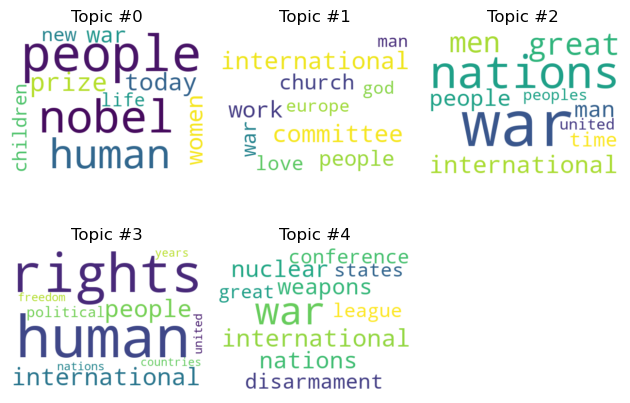

In [23]:
# Create word cloud for each topic
for topic_idx, topic in enumerate(lda_model.components_):
    # Get top 10 words for the current topic
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_word_weights = [topic[i] for i in top_words_idx]

    # Create word cloud
    wc = WordCloud(background_color='white', max_words=20, width=400, height=300)
    wc.generate_from_frequencies(dict(zip(top_words, top_word_weights)))

    # Plot word cloud
    plt.subplot(2, 3, topic_idx+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title('Topic #{}'.format(topic_idx))

plt.tight_layout()
plt.show()

### - motivation text analysis

In [24]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [25]:
df_m = pd.read_csv('nobel.csv')

In [26]:
# Define a function to tokenize the motivation text
def tokenize_text(text):
    return word_tokenize(text.lower())

In [27]:
# Apply the tokenization function to the motivation text column
df_m['motivation_tokens'] = df_m['motivation'].apply(tokenize_text)

In [28]:
# convert the 'awardYear' column to datetime format
df_m['awardYear'] = pd.to_datetime(df_m['awardYear'], format='%Y')

# Group the data by category and decade, and aggregate the motivation tokens into a list
grouped_m1 = df_m.groupby([pd.Grouper(key='awardYear', freq='10AS'), 'category'])['motivation_tokens'].agg(sum)


In [29]:
df_gm=grouped_m1.reset_index()

In [30]:
# Define stop words to remove from text
stop_words = stopwords.words(['english','french','arabic'])+ ['amp','\n',';',',',':',''," ",'–','-','_','–'
                                         'can', 'could', 'may', 'might', 'must', 
                                          'will', 'would', 'should', 'shall',
                                          'america', 'canada','france', 
                                          'germany', 'italy', 'china', 'japan', 
                                          'spain','us','one','Nobel',
                                        'thereby','especially',"'s",'/i','work']#+ list(string.punctuation) 
punctuations = string.punctuation

In [31]:
df_gm['motivation_words'] = df_gm['motivation_tokens'].apply(lambda x:
                                [word.lower() for word in x 
                                 if word.lower() not in stop_words 
                                 and word not in punctuations])

In [32]:
df_gm

awardYear                category  \
0  1901-01-01               Chemistry   
1  1901-01-01              Literature   
2  1901-01-01                   Peace   
3  1901-01-01                 Physics   
4  1901-01-01  Physiology or Medicine   
..        ...                     ...   
61 2011-01-01       Economic Sciences   
62 2011-01-01              Literature   
63 2011-01-01                   Peace   
64 2011-01-01                 Physics   
65 2011-01-01  Physiology or Medicine   

                                    motivation_tokens  \
0   [in, recognition, of, his, services, in, the, ...   
1   [as, a, tribute, to, his, noble, ,, magnificen...   
2   [for, his, eminently, practical, administratio...   
3   [for, his, optical, precision, instruments, an...   
4   [in, recognition, of, the, contributions, to, ...   
..                                                ...   
61  [for, their, experimental, approach, to, allev...   
62  [master, of, the, contemporary, short, story, ...   
63  [for, his, efforts, to, achieve, peace, and, i...   
64  [for, the, discovery, of, the, accelerating, e...   
65  [for, their, discoveries, concerning, the, act...   

                                     motivation_words  
0   [recognition, services, advancement, organic, ...  
1   [tribute, noble, magnificent, versatile, poetr...  
2   [eminently, practical, administration, inter-p...  
3   [optical, precision, instruments, spectroscopi...  
4   [recognition, contributions, knowledge, cell, ...  
..                                                ...  
61  [experimental, approach, alleviating, global, ...  
62  [master, contemporary, short, story, created, ...  
63  [efforts, achieve, peace, international, coope...  
64  [discovery, accelerating, expansion, universe,...  
65  [discoveries, concerning, activation, innate, ...  

[66 rows x 4 columns]

In [33]:
# Group data by category and year
df_gm['year'] = pd.DatetimeIndex(df_gm['awardYear']).year
df_gm_grouped = df_gm.groupby(['category', pd.Grouper(key='awardYear', freq='10Y'), 'year'])

# Count frequency of each word in motivation_words
word_counts = {}
for name, group in df_gm_grouped:
    category, date, year = name
    words = [word.lower() for row in group['motivation_words'] for word in row]
    counts = Counter(words)
    if category not in word_counts:
        word_counts[category] = {}
    if year not in word_counts[category]:
        word_counts[category][year] = {}
    word_counts[category][year][date] = counts

__Count with numbers of existing times__

In [34]:
# Show the most common 5 words for each category and 10 years
for category in word_counts:
    print(f'Category: {category}')
    for year in word_counts[category]:
        print(f'\tYear: {year}')
        for date in word_counts[category][year]:
            print(f'\t\tDate: {date}')
            counts = word_counts[category][year][date]
            most_common = counts.most_common(5)
            for word, count in most_common:
                print(f'\t\t\t{word}: {count}')

Category: Chemistry
	Year: 1901
		Date: 1901-12-31 00:00:00
			recognition: 8
			services: 7
			chemistry: 4
			chemical: 4
			rendered: 4
	Year: 1911
		Date: 1911-12-31 00:00:00
			recognition: 4
			chemistry: 4
			elements: 3
			organic: 3
			new: 2
	Year: 1921
		Date: 1921-12-31 00:00:00
			investigations: 4
			constitution: 3
			substances: 3
			fermentation: 2
			sugar: 2
	Year: 1931
		Date: 1931-12-31 00:00:00
			recognition: 4
			investigations: 4
			contributions: 3
			invention: 2
			development: 2
	Year: 1941
		Date: 1941-12-31 00:00:00
			discovery: 4
			proteins: 3
			enzymes: 3
			research: 2
			concerning: 2
	Year: 1951
		Date: 1951-12-31 00:00:00
			discoveries: 3
			chemistry: 3
			chemical: 3
			invention: 2
			partition: 2
	Year: 1961
		Date: 1961-12-31 00:00:00
			studies: 5
			chemistry: 4
			chemical: 4
			structures: 3
			extremely: 3
	Year: 1971
		Date: 1971-12-31 00:00:00
			compounds: 4
			contributions: 4
			structure: 4
			ribonuclease: 3
			concerning: 3
	Ye

__Count with frequency of existing times__

In [35]:
# Count frequency of each word in motivation_words
word_counts = {}
for name, group in df_gm_grouped:
    category, date, year = name
    words = [word.lower() for row in group['motivation_words'] for word in row]
    total_words = len(words)
    counts = Counter(words)
    if category not in word_counts:
        word_counts[category] = {}
    if year not in word_counts[category]:
        word_counts[category][year] = {}
    word_counts[category][year][date] = {word: count/total_words for word, count in counts.items()}

# Show the most common 5 words for each category and 10 years
for category in word_counts:
    print(f'Category: {category}')
    for year in word_counts[category]:
        print(f'\tYear: {year}')
        for date in word_counts[category][year]:
            print(f'\t\tDate: {date}')
            frequencies = word_counts[category][year][date]
            most_common = [(word, frequency) for word, frequency in frequencies.items()]
            most_common.sort(key=lambda x: x[1], reverse=True)
            most_common = most_common[:5]
            for word, frequency in most_common:
                print(f'\t\t\t{word}: {frequency:.3f}')


Category: Chemistry
	Year: 1901
		Date: 1901-12-31 00:00:00
			recognition: 0.085
			services: 0.074
			chemistry: 0.043
			chemical: 0.043
			rendered: 0.043
	Year: 1911
		Date: 1911-12-31 00:00:00
			recognition: 0.053
			chemistry: 0.053
			elements: 0.040
			organic: 0.040
			new: 0.027
	Year: 1921
		Date: 1921-12-31 00:00:00
			investigations: 0.057
			constitution: 0.043
			substances: 0.043
			fermentation: 0.029
			sugar: 0.029
	Year: 1931
		Date: 1931-12-31 00:00:00
			recognition: 0.068
			investigations: 0.068
			contributions: 0.051
			invention: 0.034
			development: 0.034
	Year: 1941
		Date: 1941-12-31 00:00:00
			discovery: 0.059
			proteins: 0.044
			enzymes: 0.044
			research: 0.029
			concerning: 0.029
	Year: 1951
		Date: 1951-12-31 00:00:00
			discoveries: 0.047
			chemistry: 0.047
			chemical: 0.047
			invention: 0.031
			partition: 0.031
	Year: 1961
		Date: 1961-12-31 00:00:00
			studies: 0.045
			chemistry: 0.036
			chemical: 0.036
			structures: 0.027
			extremel

__Only "Economic Science" and "Peace" categories:__

In [36]:
# Count frequency of each word in motivation_words
word_counts = {}
for name, group in df_gm_grouped:
    category, date, year = name
    if category not in ['Economic Sciences', 'Peace']:
        continue
    words = [word.lower() for row in group['motivation_words'] for word in row]
    total_words = len(words)
    counts = Counter(words)
    if category not in word_counts:
        word_counts[category] = {}
    if year not in word_counts[category]:
        word_counts[category][year] = {}
    word_counts[category][year][date] = {word: count/total_words for word, count in counts.items()}

# Show the most common 5 words for each category and 10 years
for category in word_counts:
    if category not in ['Economic Sciences', 'Peace']:
        continue
    print(f'Category: {category}')
    for year in word_counts[category]:
        print(f'\tYear: {year}')
        for date in word_counts[category][year]:
            print(f'\t\tDate: {date}')
            frequencies = word_counts[category][year][date]
            most_common = [(word, frequency) for word, frequency in frequencies.items()]
            most_common.sort(key=lambda x: x[1], reverse=True)
            most_common = most_common[:5]
            for word, frequency in most_common:
                print(f'\t\t\t{word}: {frequency:.3f}')

Category: Economic Sciences
	Year: 1961
		Date: 1961-12-31 00:00:00
			economic: 0.148
			developed: 0.111
			dynamic: 0.111
			analysis: 0.111
			applied: 0.074
	Year: 1971
		Date: 1971-12-31 00:00:00
			economic: 0.104
			theory: 0.082
			pioneering: 0.052
			research: 0.037
			international: 0.030
	Year: 1981
		Date: 1981-12-31 00:00:00
			theory: 0.101
			pioneering: 0.056
			financial: 0.056
			economic: 0.056
			markets: 0.045
	Year: 1991
		Date: 1991-12-31 00:00:00
			theory: 0.068
			economic: 0.068
			analysis: 0.053
			methods: 0.030
			contributions: 0.023
	Year: 2001
		Date: 2001-12-31 00:00:00
			analysis: 0.075
			economic: 0.068
			markets: 0.045
			time: 0.030
			analyses: 0.023
	Year: 2011
		Date: 2011-12-31 00:00:00
			analysis: 0.090
			empirical: 0.064
			poverty: 0.051
			theory: 0.051
			experimental: 0.038
Category: Peace
	Year: 1901
		Date: 1901-12-31 00:00:00
			peace: 0.102
			international: 0.042
			arbitration: 0.034
			movement: 0.025
			war: 0.025
	Year: 1

In [37]:
# convert lists to strings
df_gm['motivation_words'] = df_gm['motivation_words'].apply(lambda x: ' '.join(x))

# add a new column representing the decade of the award year
df_gm['decade'] = df_gm['awardYear'].apply(lambda x: str(x)[:3] + '0s')

# group the data by the decade column and concatenate the motivation words for each group
df_econ_decade = df_gm[df_gm['category']=='Economic Sciences'].groupby('decade')['motivation_words'].apply(lambda x: ' '.join(x)).reset_index()
df_econ_decade


decade                                   motivation_words
0  1960s  developed applied dynamic models analysis econ...
1  1970s  pathbreaking contribution theory international...
2  1980s  pioneering analyses saving financial markets s...
3  1990s  contributions welfare economics development th...
4  2000s  analyses markets asymmetric information analys...
5  2010s  experimental approach alleviating global pover...

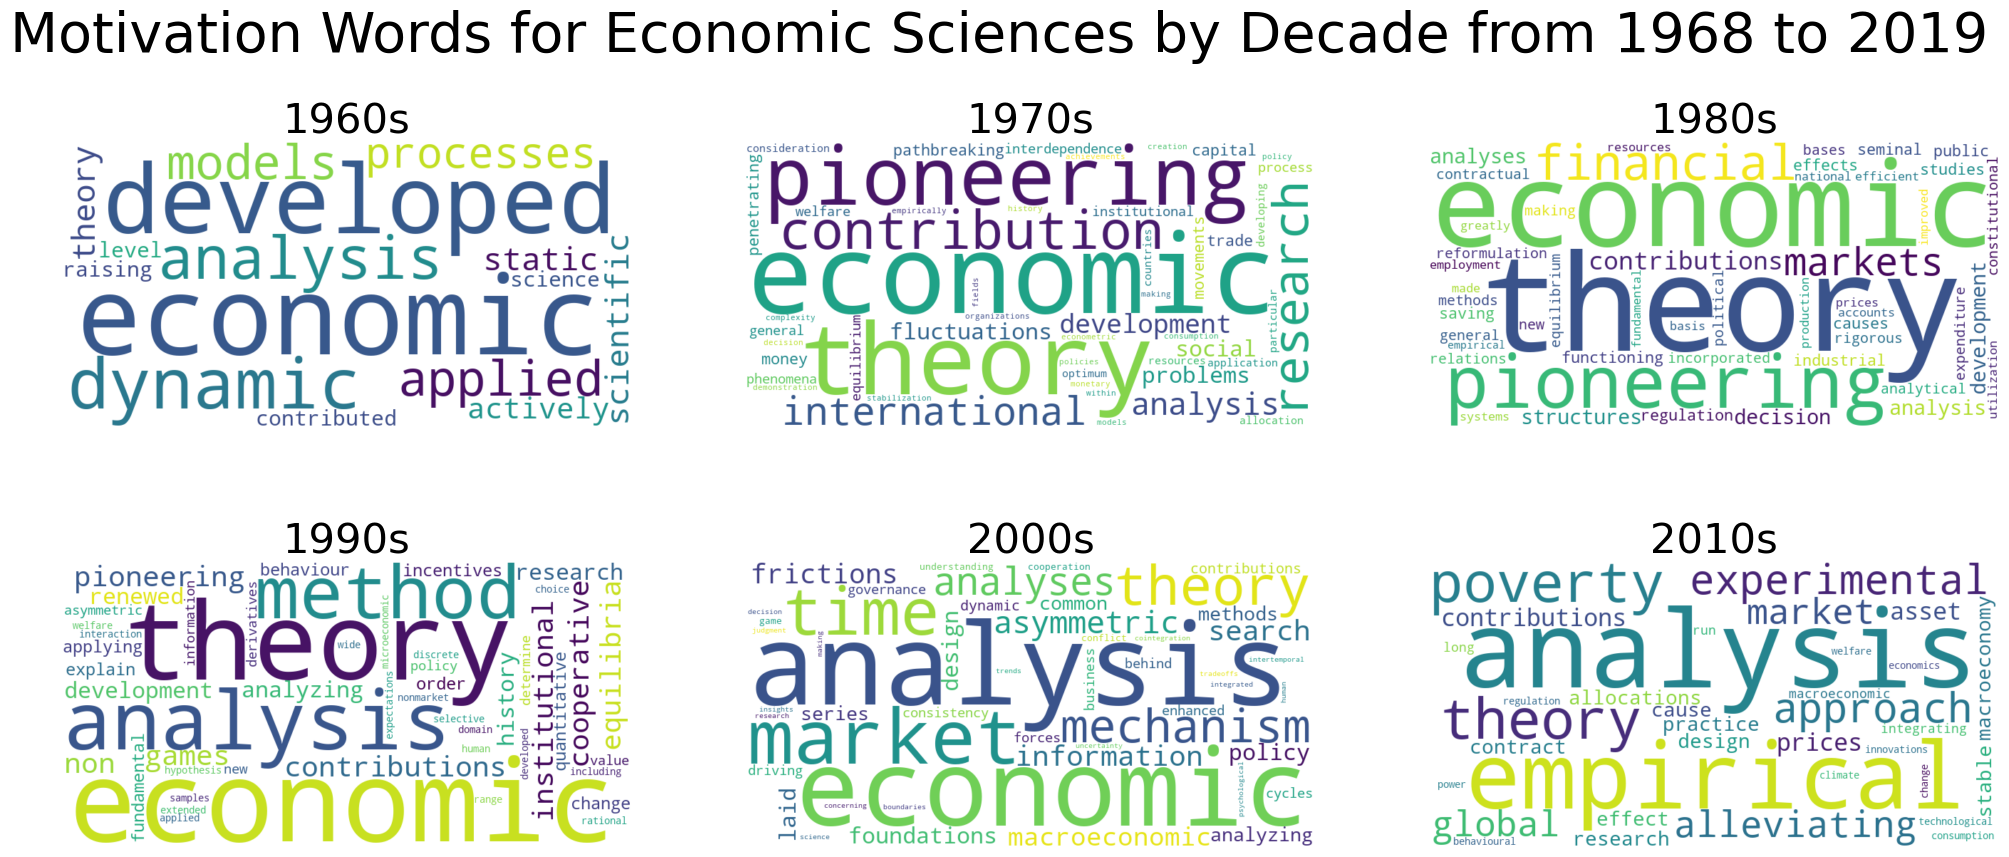

In [38]:
# Create a figure with multiple subplots, one for each decade
fig, axs = plt.subplots(2, 3, figsize=(25, 10))
axs = axs.flatten()

# Loop over the decades and draw a word cloud for each one
for i, row in df_econ_decade.iterrows():
    decade = row['decade']
    words = row['motivation_words']
    
    # Create a word cloud for the current decade
    wc = WordCloud(background_color='white', max_words=50, width=800, height=400)
    wc.generate(words)
    
    # Plot the word cloud in the corresponding subplot
    axs[i].imshow(wc, interpolation='bilinear')
    axs[i].axis('off')
    axs[i].set_title(decade, fontsize=30)

# Add a title to the figure
fig.suptitle('Motivation Words for Economic Sciences by Decade from 1968 to 2019', fontsize=40)

# Show the figure
plt.show()

In [39]:
# group the data by the decade column and concatenate the motivation words for each group
df_pec_decade = df_gm[df_gm['category']=='Peace'].groupby('decade')['motivation_words'].apply(lambda x: ' '.join(x)).reset_index()
df_pec_decade

decade                                   motivation_words
0   1900s  eminently practical administration inter-parli...
1   1910s  effort expose fight considers main cause war n...
2   1920s  crucial role bringing locarno treaty crucial r...
3   1930s  untiring struggle courageous efforts chairman ...
4   1940s  pioneering international peace movement compas...
5   1950s  non-violent struggle apartheid altruism revere...
6   1960s  developing effective constructive internationa...
7   1970s  source inspiration repressed people latin worl...
8   1980s  disarmament nuclear weapon-free zones disarmam...
9   1990s  non-violent struggle democracy human rights to...
10  2000s  efforts build disseminate greater knowledge ma...
11  2010s  efforts achieve peace international cooperatio...

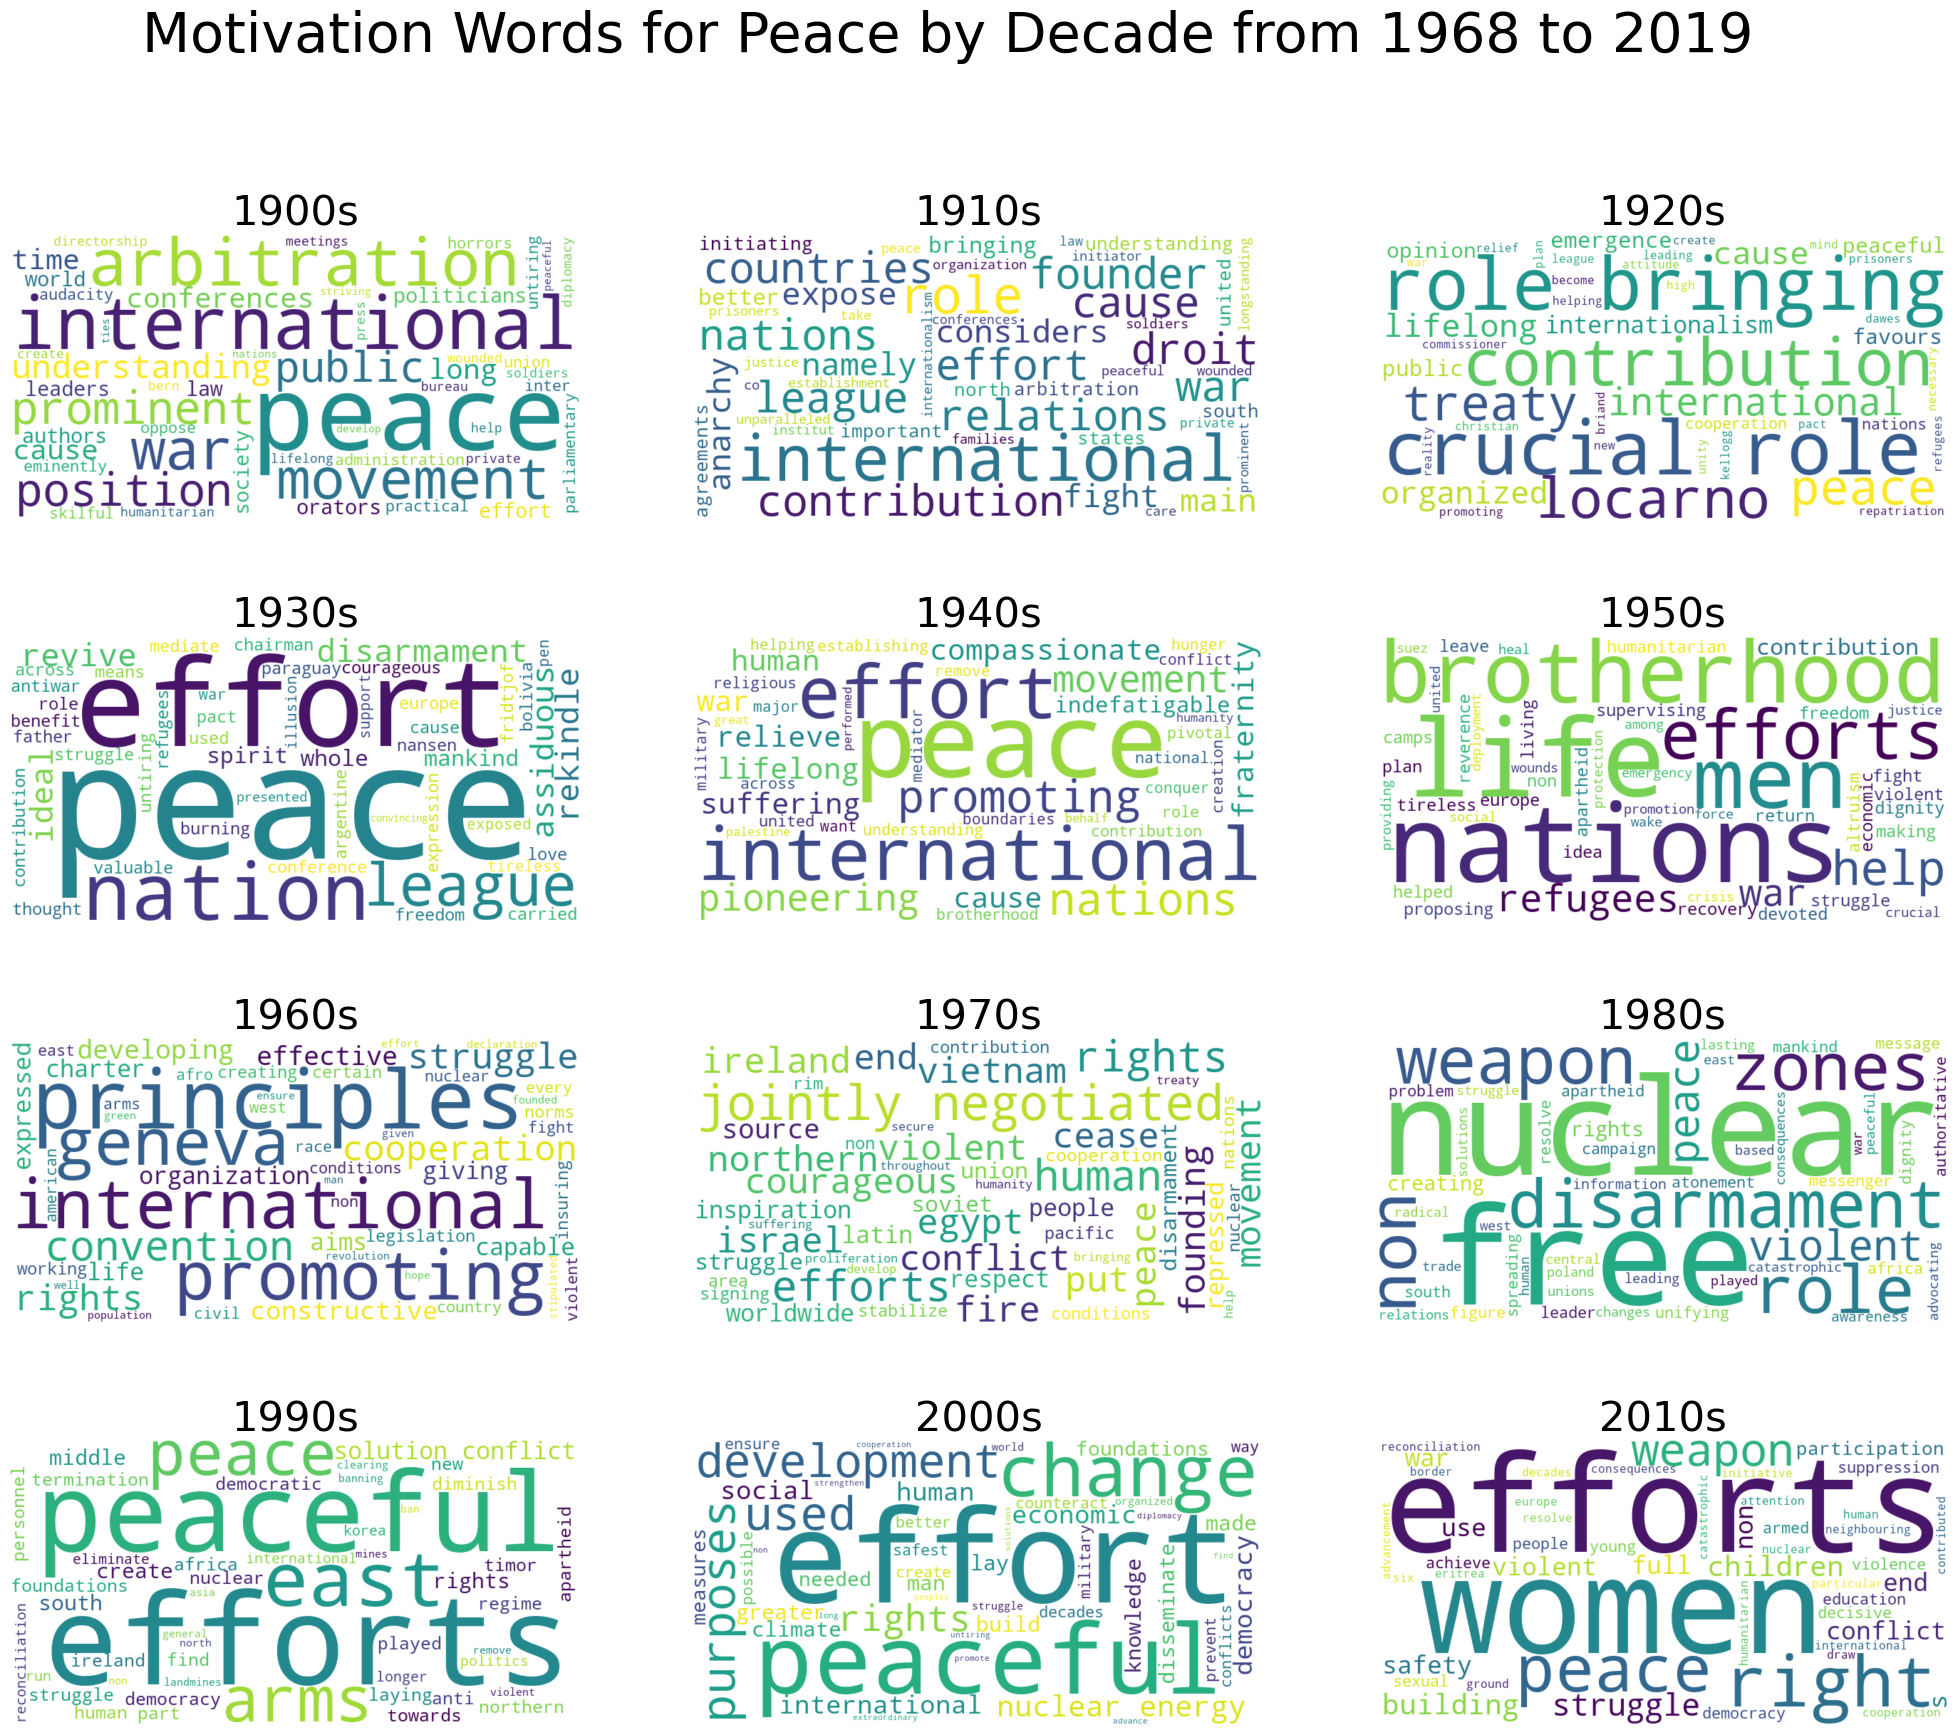

In [40]:
# Create a figure with multiple subplots, one for each decade
fig, axs = plt.subplots(4, 3, figsize=(25, 20))
axs = axs.flatten()

# Loop over the decades and draw a word cloud for each one
for i, row in df_pec_decade.iterrows():
    decade = row['decade']
    words = row['motivation_words']
    
    # Create a word cloud for the current decade
    wc = WordCloud(background_color='white', max_words=50, width=800, height=400)
    wc.generate(words)
    
    # Plot the word cloud in the corresponding subplot
    axs[i].imshow(wc, interpolation='bilinear')
    axs[i].axis('off')
    axs[i].set_title(decade, fontsize=30)

# Add a title to the figure
fig.suptitle('Motivation Words for Peace by Decade from 1968 to 2019', fontsize=40)

# Show the figure
plt.show()

## 3.

In [41]:
# Calculate sentiment for each lecture
df1['Sentiment'] = df1['Lecture'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Calculate the decade for each row
df1['Decade'] = (df1['Year'] // 10) * 10

# Group the DataFrame by decade and calculate the average sentiment score for each decade
average_sentiment_by_decade = df1.groupby('Decade')['Sentiment'].mean().reset_index()

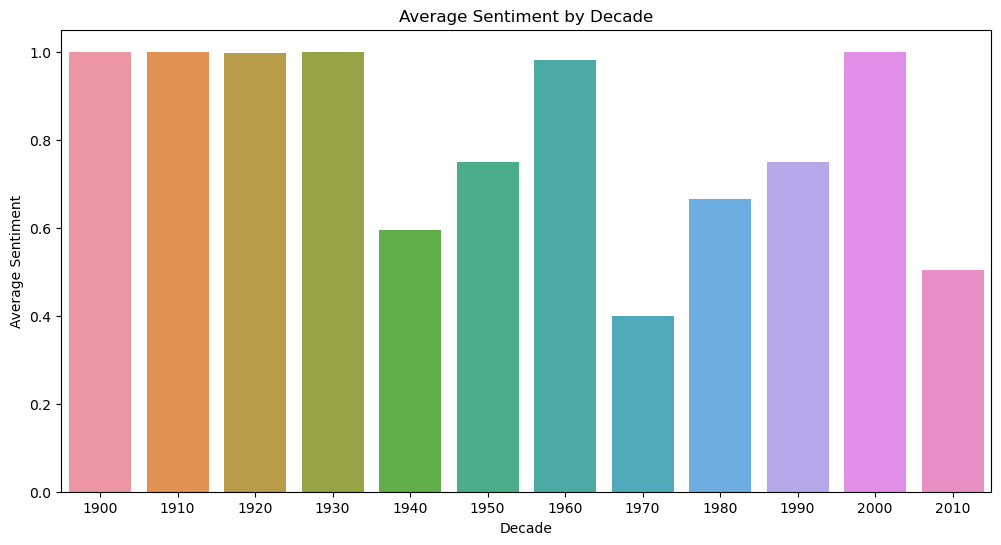

In [42]:
# Visualize the results using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Decade', y='Sentiment', data=average_sentiment_by_decade)
plt.xlabel('Decade')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Decade')
plt.show()

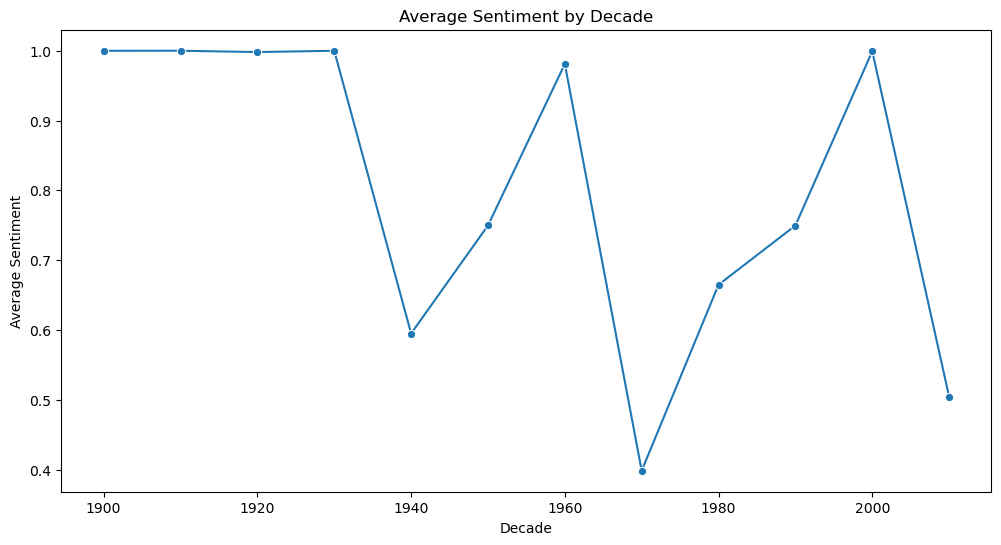

In [43]:
# Visualize the results using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Decade', y='Sentiment', data=average_sentiment_by_decade, marker='o')
plt.xlabel('Decade')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Decade')
plt.show()

In [44]:
# Assign each document to its dominant topic
doc_topic = lda_model.transform(bow_matrix)
dominant_topic = np.argmax(doc_topic, axis=1)

# Create a new DataFrame with the dominant topic and the associated text
topic_sentiment_df = pd.DataFrame({'dominant_topic': dominant_topic, 'text': grouped['processed_text']})

# Create a sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Perform sentiment analysis on the text for each topic
topic_sentiment_df['sentiment'] = topic_sentiment_df['text'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Group by dominant topic and calculate the average sentiment score
average_sentiment_by_topic = topic_sentiment_df.groupby('dominant_topic')['sentiment'].mean().reset_index()


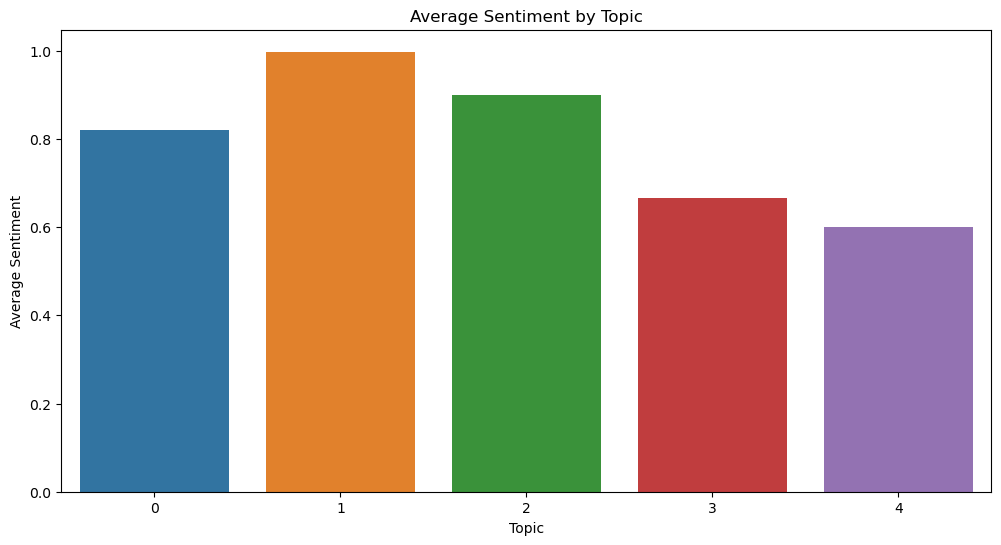

In [45]:
# Visualize the results using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='dominant_topic', y='sentiment', data=average_sentiment_by_topic)
plt.xlabel('Topic')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment by Topic')
plt.show()

__How many "war"s exist in negative and positive contexts?__

In [46]:
# Define a function to calculate sentiment score of a given word in a given text window
def word_sentiment_in_context(word, text, window_size=5):
    words = text.split()
    word_indices = [i for i, w in enumerate(words) if w.lower() == word.lower()]
    sentiment_scores = []
    for index in word_indices:
        start = max(0, index - window_size)
        end = min(len(words), index + window_size + 1)
        window_text = ' '.join(words[start:end])
        sentiment_score = analyzer.polarity_scores(window_text)['compound']
        sentiment_scores.append(sentiment_score)
    return sentiment_scores

# Calculate sentiment scores of the word "war" in positive and negative contexts
positive_war_count = 0
negative_war_count = 0

for index, row in df1.iterrows():
    text = ' '.join([word for word in row['words'] if word.lower() not in stop_words])
    war_sentiments = word_sentiment_in_context('war', text)
    
    for sentiment in war_sentiments:
        if sentiment > 0:
            positive_war_count += 1
        elif sentiment < 0:
            negative_war_count += 1

print(f'Positive "war" count: {positive_war_count}')
print(f'Negative "war" count: {negative_war_count}')

Positive "war" count: 144
Negative "war" count: 810


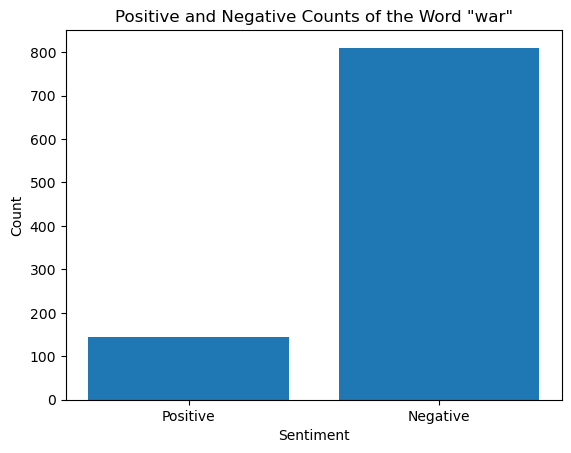

In [47]:
# Data for the bar plot
labels = ['Positive', 'Negative']
values = [positive_war_count, negative_war_count]

# Create the bar plot
plt.bar(labels, values)

# Customize the plot
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Positive and Negative Counts of the Word "war"')

# Show the plot
plt.show()

In [48]:
# Initialize empty lists
index_list = []
sentiment_list = []

# Iterate over each row in the DataFrame
for index, row in df1.iterrows():
    # Get text from "words" column
    words = row['words']
    
    # Check if "war" appears in the text
    for i, word in enumerate(words):
        if word.lower() == 'war':
            index_list.append(index)
            sentiment_list.append(analyzer.polarity_scores(' '.join(words[:i] + words[i+1:]))['compound'])

# Create a DataFrame with index and sentiment values
war_occurrences = pd.DataFrame({'Index': index_list, 'Sentiment': sentiment_list})


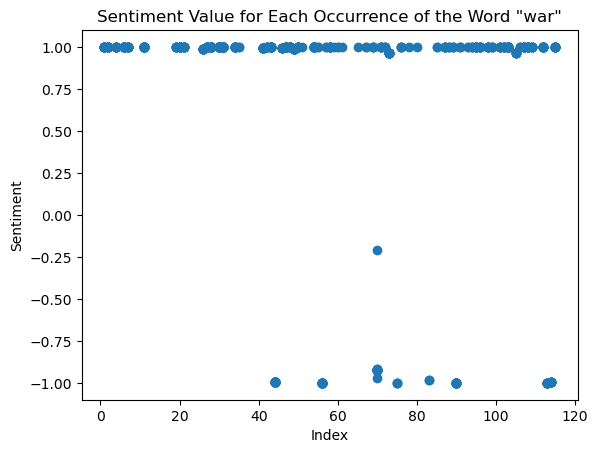

In [49]:
# Create the scatter plot
plt.scatter(war_occurrences['Index'], war_occurrences['Sentiment'])

# Customize the plot
plt.xlabel('Index')
plt.ylabel('Sentiment')
plt.title('Sentiment Value for Each Occurrence of the Word "war"')

# Show the plot
plt.show()

In [50]:
def get_war_context(text):
    blob = TextBlob(text)
    war_sentences = [str(sent) for sent in blob.sentences if "war" in sent.lower()]
    return war_sentences

df1['war_context'] = df1['Lecture'].apply(get_war_context)

In [51]:
nlp = spacy.load('en_core_web_sm')

def get_named_entities(sentences):
    named_entities = []
    for sent in sentences:
        doc = nlp(sent)
        for ent in doc.ents:
            named_entities.append((ent.text, ent.label_))
    return named_entities

df1['war_entities'] = df1['war_context'].apply(get_named_entities)

In [52]:
def extract_target_context(texts, target_word, window_size=10):
    target_contexts = []
    
    for text in texts:
        tokens = word_tokenize(text)
        
        for i, word in enumerate(tokens):
            if word.lower() == target_word.lower():
                start = max(0, i - window_size)
                end = min(i + window_size + 1, len(tokens))
                target_contexts.append(" ".join(tokens[start:end]))
                
    return target_contexts

target_word = "war"
window_size = 10

target_contexts = extract_target_context(df1['Lecture'], target_word, window_size)

vectorizer3 = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
bow_matrix3 = vectorizer3.fit_transform(target_contexts)

lda_model3 = LatentDirichletAllocation(n_components=5, random_state=0)
lda_model3.fit(bow_matrix3)

feature_names3 = vectorizer3.get_feature_names_out()

for topic_idx, topic in enumerate(lda_model3.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))
    print()

Topic #0:
new supreme worked middle needs years march particularly living long

Topic #1:
worked voice conditions fraternity moment taking injustice crime particularly cruel

Topic #2:
organized historic village years worked old knowledge states closely follow

Topic #3:
worked middle concerning moral survival joy increasingly destiny equality majority

Topic #4:
needs joy immediately look worked concerning historic equality survival moral

